In [1]:
import numpy as np
import pandas as pd
import os
from tqdm import trange
import matplotlib.pyplot as plt
from keras import backend as K
%matplotlib inline

months = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

Using TensorFlow backend.


In [2]:
def qloss(y_true, y_pred):
    q = np.array(range(1, 100))
    tmp1 = (q / 100 - 1) * (y_true - y_pred)
    tmp2 = q / 100 * (y_true - y_pred)
    return K.mean(K.maximum(tmp1, tmp2))

In [3]:
data_set = 'Irish_2010'

path = os.path.abspath(os.path.join(os.getcwd(), os.path.pardir))

attr = pd.read_csv(os.path.join(path, 'data', f'{data_set}_attr_final.csv'))
data = []
for i in trange(len(attr)):
    id = attr['ID'][i]
    df = pd.read_csv(os.path.join(path, 'data', f'{data_set}_monthly', f'{id}.csv'), header = None).values
    data.append(df)
data = np.array(data)

100%|██████████| 918/918 [00:29<00:00, 30.98it/s]


In [4]:
month = 1
n_clusters = 2
method = 'hierarchical/euclidean'

path_cluster = os.path.join(path, 'result', data_set, 'clustering', 'point', method, f'n_clusters_{n_clusters}.csv')
clusters = pd.read_csv(path_cluster, header=None)

series = data[:, month-1, :months[month-1]*24]

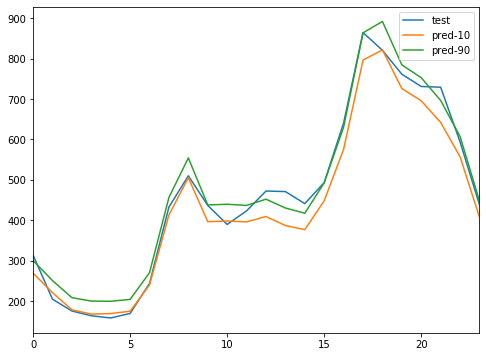

In [21]:
times = 1
# algor = 'qra/step_2'
algor = 'qrnn'
i = 1

index = list(clusters[month-1] == i)
sub_series = series[index]
sub_series = np.sum(sub_series, axis=0)

test = sub_series[-168:]
train = sub_series[:-168]

scale = np.zeros(2)
scale[0] = np.max(train)
scale[1] = np.min(train)

path_result = os.path.join(path, 'result', data_set, 'forecasting', algor, f'times_{times}', method)

pred_series = np.load(os.path.join(path_result, f'n_clusters_{n_clusters}_month_{month}.npy'))[i]
pred_series = pred_series * (scale[0] - scale[1]) + scale[1]

day = 4  # day = 1, 2, ..., 7
plt.figure(figsize=(8, 6))
plt.plot(test[(day-1)*24:day*24])
plt.plot(pred_series[:, 9][(day-1)*24:day*24])
plt.plot(pred_series[:, 89][(day-1)*24:day*24])
plt.xlim((0, 23))
plt.legend(['test', 'pred-10', 'pred-90'], loc='upper right')

In [6]:
qloss(np.tile(test, (99,1)).T, pred_series)

<tf.Tensor: id=4, shape=(), dtype=float64, numpy=8.85196869318505>